### 생선 분류
- 데이터셋: fish.csv
- 피쳐/특성: Weight, Length
- 타겟/라벨: Species
- 학습방법: 지도학습=> 분류
- 학습알고리즘: 최근접이웃알고리즘(KNN)

[1] 데이터 준비


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
Data_File= '../data/fish.csv'


In [44]:
# 행: Bream, Smelt
# 컬럼: 0,1,2
fishDF= pd.read_csv(Data_File, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [45]:
mask= (fishDF['Species']== 'Bream') | (fishDF['Species']=='Smelt')
twofish_DF= fishDF[mask][:]
twofish_DF.reset_index(drop=True, inplace=True)
print(twofish_DF.head(3), twofish_DF.index)


  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5 RangeIndex(start=0, stop=49, step=1)


In [46]:
# Species 데이터 수치화=> Bream=0, Smelt=1
twofish_DF['spc_num']=twofish_DF['Species'].replace({'Bream':0, 'Smelt':1})
print(twofish_DF.head())

  Species  Weight  Length  spc_num
0   Bream   242.0    25.4        0
1   Bream   290.0    26.3        0
2   Bream   340.0    26.5        0
3   Bream   363.0    29.0        0
4   Bream   430.0    29.0        0


[2] 피쳐와 타겟 분리

In [47]:
features= twofish_DF[['Weight', 'Length']]
target= twofish_DF['spc_num']

print(f'features= {features.shape}, {features.ndim}')

print(f'target= {target.shape}, {target.ndim}')

features= (49, 2), 2
target= (49,), 1


[3] 학습용, 테스트용 데이터셋 준비

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
# train:test=80:20 --> test_size=0.2 or train_size=0.8
# stratify(분류일 때)-> 주어진 타겟 데이터의 종류 비율을 고려
X_train, Xtest, Y_train, Y_test= train_test_split(features, target, test_size=.2, 
                                                  stratify=target, random_state=10)

In [50]:
print(f'x_train: {X_train.shape}, {X_train.ndim}')
print(f'Y_train: {Y_train.shape}, {Y_train.ndim}')
print(f'Xtest: {Xtest.shape}, {Xtest.ndim}')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}')

x_train: (39, 2), 2
Y_train: (39,), 1
Xtest: (10, 2), 2
Y_test: (10,), 1


In [51]:
# target의 비율
print(Y_train.value_counts()[0]/Y_train.shape[0])
print(Y_train.value_counts()[1]/Y_train.shape[0])

# test의 비율
print(Y_test.value_counts()[0]/Y_test.shape[0])
print(Y_test.value_counts()[1]/Y_test.shape[0])


0.717948717948718
0.28205128205128205
0.7
0.3


[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행=>fit()


In [52]:
from sklearn.neighbors import KNeighborsClassifier


In [53]:
# 인스턴스 생성
model= KNeighborsClassifier()


In [54]:
# 학습 진행==> 학습용 데이터셋 사용
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [55]:
# 학습 후 모델 파라미터 
model.classes_,model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score메서드+ test데이터셋


In [56]:
model.score(Xtest,Y_test)

1.0

[6] 예측 하기==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의: 입력 데이터가 2D형태이어야 함!

In [57]:
new_data= [[413, 27.8]]
model.predict(new_data)
# UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
# warnings.warn(  ---> 피처의 컬럼명 없어서 생긴 요류(DF로 컬럼명 넣으면 됨or ndarray형태로 전달)

c:\Users\KDP-25\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [58]:
# 오류(future Warning) 해결
new_data= pd.DataFrame([[413, 27.8]], columns=model.feature_names_in_)
model.predict(new_data)

array([0], dtype=int64)

In [61]:
# 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(new_data)  #-> distance와 index 반환
print(distance, index)
# index가 2D이므로 1D로 변환후 검색
neighbers= index.reshape(-1).tolist()
print(index.reshape(-1).tolist())
twofish_DF.loc[neighbers]['Species']

[[17.04230031 23.10497782 37.04875167 37.0653477  50.01439793]] [[25  0 21  6 22]]
[25, 0, 21, 6, 22]


25    Bream
0     Bream
21    Bream
6     Bream
22    Bream
Name: Species, dtype: object

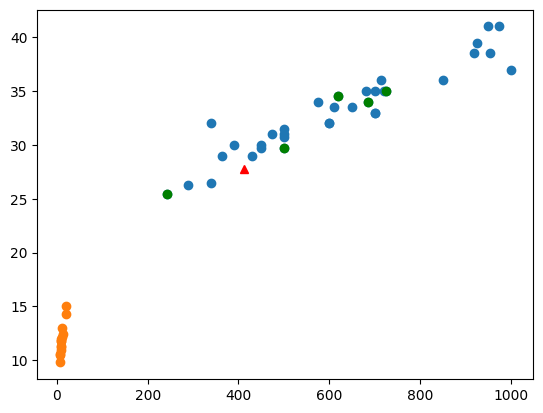

In [68]:
plt.scatter(twofish_DF.loc[:34]['Weight'], twofish_DF.loc[:34]['Length'])
plt.scatter(twofish_DF.loc[35:]['Weight'], twofish_DF.loc[35:]['Length'])
plt.plot(new_data['Weight'], new_data['Length'], 'r^')
plt.plot(twofish_DF.loc[neighbers]['Weight'], twofish_DF.loc[neighbers]['Length'], 'go')

# 범위가 너무 큼 why? -> 데이터의 비율이 달라서 -> scaling, 정규화 필요